In [1]:
%matplotlib inline

import sys

sys.path.append("..")

In [2]:
import torch
torch.cuda._lazy_init() # avoid "Unknown CUDA error"
torch.cuda.is_available()

True

In [3]:
# Load the Dataset class
from torchvision import transforms

from settings import DATA_SOURCES
from src.datasets.sketchy import Sketchy

# dataset = Sketchy(DATA_SOURCES['sketchy_test']['photos'], transforms.Grayscale(num_output_channels=1))
dataset = Sketchy(DATA_SOURCES['sketchy_test']['photos'])
len(dataset)

1250

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# Number of workers for dataloader
workers = 8

# Batch size for dataloader
batch_size = 8

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

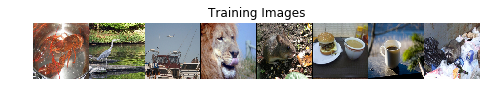

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# Create the dataloader
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=workers)

# Plot some training images
real_batch = next(iter(data_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [6]:
from src.models.hog import HOG

net = HOG()
net.to(device)
net

HOG(
  (sobel_x): SobelX()
  (sobel_y): SobelY()
  (cell_pooling): AvgPool2d(kernel_size=8, stride=8, padding=0)
)

In [11]:
inputs, labels = next(iter(data_loader))
inputs, labels = inputs.to(device), labels.to(device)
print(inputs.shape)
net(inputs)

torch.Size([8, 3, 256, 256])


tensor([[3.8178e+01, 5.5608e+01, 6.7918e+01,  ..., 6.2745e-02, 0.0000e+00,
         0.0000e+00],
        [4.7684e-07, 2.3842e-07, 1.1921e-07,  ..., 0.0000e+00, 0.0000e+00,
         9.4118e-02],
        [2.7308e+01, 0.0000e+00, 1.8773e+01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [5.7234e-01, 3.8774e+00, 8.0304e+00,  ..., 4.7059e-01, 5.0196e-01,
         4.7059e-01],
        [2.3792e+00, 8.0792e+00, 3.6862e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.0362e+01, 8.7901e+01, 1.0661e+02,  ..., 0.0000e+00, 0.0000e+00,
         6.2745e-02]], device='cuda:0')

In [ ]:
net(inputs).shape

In [10]:
for i, data in enumerate(data_loader, 0): # iterate batches
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    print(outputs)

tensor([[ 0.3700,  3.5642,  0.0000,  ...,  0.1255,  0.0000,  0.0000],
        [19.2261, 19.5914, 33.7843,  ...,  0.0000,  0.0000,  0.0000],
        [ 5.0542,  9.7599,  3.4937,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [40.8287,  0.0000,  0.3979,  ...,  0.0000,  0.0000,  0.0000],
        [88.2353, 16.5813, 82.9251,  ...,  0.0000,  0.0000,  0.0000],
        [ 6.2514,  9.3063, 31.7374,  ...,  0.0000,  0.0000,  4.8941]],
       device='cuda:0')
tensor([[1.5621e+01, 1.4063e+01, 2.6074e+01,  ..., 1.5686e-02, 0.0000e+00,
         0.0000e+00],
        [4.0618e+01, 2.7623e+01, 9.2574e+01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.1017e+01, 4.4565e+01, 4.5342e+01,  ..., 0.0000e+00, 8.0157e+00,
         0.0000e+00],
        ...,
        [3.3858e+00, 8.4615e+00, 8.0835e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.7818e+01, 4.6229e+00, 1.4627e+01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.4791e+01,